In [3]:
responses = []
import json
response_path = "/home/lym/GraphRAG4OralHealth/Benchmark/Knowledge Objectives/2d648ad1-917e-4be5-8fa2-befb0c3c1497_1744992291840_success.jsonl"
with open(response_path, "r", encoding="utf-8") as f:
    for line in f:
        if line.strip():
            print(line)
            data = json.loads(line)
            msg = data["response"]["body"]["choices"][0]["message"]
            responses.append({
                "id": data["custom_id"],
                "prediction": msg.get("content", "").strip(),
                "reason": msg.get("reasoning_content", "").strip()
            })
save_path="/home/lym/GraphRAG4OralHealth/Benchmark/Knowledge Objectives/success.jsonl"

#如果id不连续，补上空response
id = 1
for req in responses: 
    if req["id"] != "request-"+str(id):
        print(id)
        
        responses.insert(id-1, {
            "id": "request-"+str(id),
            "prediction": "",
            "reason": ""
        })
    id += 1
with open(save_path, "w", encoding="utf-8") as f:
    for response in responses:
        f.write(json.dumps(response, ensure_ascii=False) + "\n")

2159
2752
2785
2853
2861
2870
2881
2892
2897
2901
2903
2906
2910
2917
2925
2927
2931
2933
2936
2937
2946
2950
2952
2958
2960
2962
2964
2968
2974
2977
2983
2995
2998


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

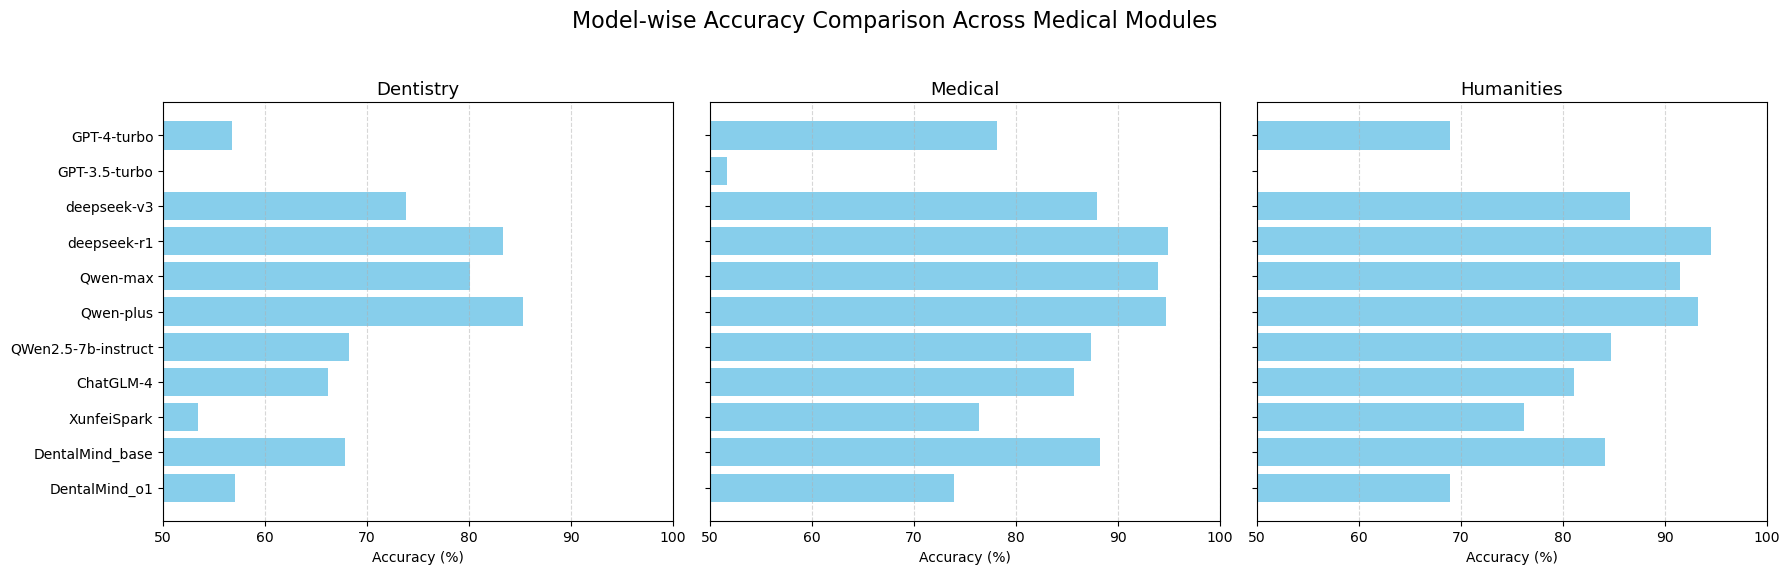

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm

# 模型英文显示顺序（和你希望的一致）
model_order = [
    "GPT-4-turbo", "GPT-3.5-turbo", "deepseek-v3", "deepseek-r1",
    "Qwen-max", "Qwen-plus", "QWen2.5-7b-instruct", "ChatGLM-4",
    "XunfeiSpark", "DentalMind_base", "DentalMind_o1", "DentalMind_o1+GraphRAG"
]

# 读取数据
df = pd.read_excel("模型评估结果_最终版.xlsx", sheet_name=0)
df["科目"] = df["科目"].astype(str).str.strip().str.replace(r"\s+", "", regex=True)

# 提取模块
target_rows = ["口腔专业知识", "医学专业知识", "医学人文综合"]
df = df[df["科目"].isin(target_rows)]
df.set_index("科目", inplace=True)
df = df.drop(columns=["数量"])

# 转置：index=模型名
df = df.T

# ➕ 如果有缺的模型，比如 GraphRAG，还没评估数据，补 NaN 行
for model in model_order:
    if model not in df.index:
        df.loc[model] = [float("nan")] * df.shape[1]  # 插入空值行

# ✅ 按指定顺序重排行（即模型顺序）
df = df.loc[model_order]

# 绘图
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

modules = df.columns.tolist()
name_map = {"口腔专业知识": "Dentistry", "医学专业知识": "Medical", "医学人文综合": "Humanities"}

for i, module in enumerate(modules):
    axs[i].barh(df.index.tolist(), df[module] * 100, color='skyblue')
    axs[i].set_title(name_map[module], fontsize=13)
    axs[i].set_xlim(30, 100)
    axs[i].set_xlabel("Accuracy (%)")
    axs[i].invert_yaxis()
    axs[i].grid(axis='x', linestyle='--', alpha=0.5)

plt.suptitle("Model-wise Accuracy Comparison Across Medical Modules", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("objective_score_breakdown.png", dpi=300)
plt.show()
